In [1]:
#The data in “songs.csv” contains descriptive information on various songs from Spotify 
#and one person’s personal opinion of each song. 
#I want to build a model that can predict “target”; 
#target is a 1 when they liked the song, and 0 when the did not like it.
import pandas as pd

In [3]:
songs = pd.read_csv("songs.csv")
songs.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
#Let's also have a look at some descriptive statistics:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
#Now check the dimensions of the data
songs.shape

(2017, 17)

In [7]:
list(songs.columns)

['Unnamed: 0',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target',
 'song_title',
 'artist']

In [8]:
#Need to clean the data. It looks like "unnamed" is a column which does not tell us anything, so we should remove this
#I also want to check for missing data

In [9]:
songs.isnull().sum() #no missing values, ideal

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [10]:
#Check for unique values in the columns
print(sorted(songs["mode"].unique()))

[0, 1]


In [11]:
print(sorted(songs["time_signature"].unique()))

[1.0, 3.0, 4.0, 5.0]


In [12]:
print(sorted(songs["target"].unique()))

[0, 1]


In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(songs)

In [14]:
songs = songs.drop(columns = ["Unnamed: 0"], axis = 1)
songs.head() #dropping unnamed column, gives no new info

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [16]:
#Arrange the data so target = 1 is first
songs = songs.sort_values("target", ascending = False)
songs.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
16,0.02390,0.603,270827,0.955,0.045100,1,0.1190,-4.111,1,0.0458,123.922,4.0,0.773,1,World In Motion,New Order
509,0.00909,0.694,337187,0.716,0.000814,7,0.0772,-7.468,1,0.0513,121.427,4.0,0.896,1,Der Kommissar,After The Fire
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House


In [17]:
#Now create dummies
songs = pd.get_dummies(songs, drop_first = True)

songs.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
16,0.02390,0.603,270827,0.955,0.045100,1,0.1190,-4.111,1,0.0458,...,0,0,0,0,0,0,0,0,0,0
509,0.00909,0.694,337187,0.716,0.000814,7,0.0772,-7.468,1,0.0513,...,0,0,0,0,0,0,0,0,0,0
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Now try models
from sklearn.linear_model import LinearRegression

In [21]:
#Before running the model, ook at the correlation figures
songs.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,...,0.051189,-0.020538,0.013160,-0.008945,-0.009889,-0.015208,0.052817,0.050161,-0.009176,-0.014197
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,...,-0.002549,0.008039,-0.023860,-0.017490,0.030642,0.007689,0.024013,0.016958,0.020416,0.001602
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,...,0.014512,0.058894,-0.015127,-0.003785,0.000948,-0.002489,0.012813,-0.014426,0.019851,-0.006456
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,...,-0.028454,0.010104,-0.027662,-0.002710,0.000963,0.022611,-0.056318,-0.049008,-0.008431,0.000257
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,...,-0.008513,0.083374,-0.015376,-0.010870,-0.007771,-0.010870,-0.010869,-0.010870,0.051518,-0.010782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
artist_tobyMac,-0.015208,0.007689,-0.002489,0.022611,-0.010870,-0.032624,-0.013076,0.018433,0.017722,-0.014606,...,-0.000496,-0.000702,-0.000702,-0.000496,-0.000702,1.000000,-0.000496,-0.000496,-0.000496,-0.000496
artist_권나무 Kwon Tree,0.052817,0.024013,0.012813,-0.056318,-0.010869,-0.026517,-0.017260,-0.050684,0.017722,-0.010915,...,-0.000496,-0.000702,-0.000702,-0.000496,-0.000702,-0.000496,1.000000,-0.000496,-0.000496,-0.000496
artist_도시총각 Dosichonggak,0.050161,0.016958,-0.014426,-0.049008,-0.010870,0.034546,-0.010726,-0.028772,0.017722,-0.012253,...,-0.000496,-0.000702,-0.000702,-0.000496,-0.000702,-0.000496,-0.000496,1.000000,-0.000496,-0.000496
artist_카우칩스 The CowChips,-0.009176,0.020416,0.019851,-0.008431,0.051518,-0.032624,-0.014609,-0.007713,-0.027989,-0.016192,...,-0.000496,-0.000702,-0.000702,-0.000496,-0.000702,-0.000496,-0.000496,-0.000496,1.000000,-0.000496


In [22]:
y = songs["target"]
X = songs.drop(columns = "target")

In [28]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [29]:
model.score(X, y)

0.997024890042376

In [30]:
model.intercept_  

56079.014917944645

In [31]:
model.coef_ #These are low R squared values, meaning we cannot predict target very well

array([-4.14797225e-04, -2.07776485e-04, -1.86854980e-08, ...,
       -2.80419163e+04, -2.80398528e+04, -2.80528776e+04])

In [32]:

pd.DataFrame(
  {
  "Variable" : X.columns.values,
  "Coefficient" : model.coef_
  }
)

,Variable,Coefficient
0,acousticness,-4.147972e-04
1,danceability,-2.077765e-04
2,duration_ms,-1.868550e-08
3,energy,-1.158947e-03
4,instrumentalness,-1.177117e-03
...,...,...
3305,artist_tobyMac,-2.806916e+04
3306,artist_권나무 Kwon Tree,-2.803353e+04
3307,artist_도시총각 Dosichonggak,-2.804192e+04
3308,artist_카우칩스 The CowChips,-2.803985e+04


In [33]:
import statsmodels.api as sm
X_i = sm.add_constant(X)

X_i.head()

,const,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,1.0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,...,0,0,0,0,0,0,0,0,0,0
16,1.0,0.02390,0.603,270827,0.955,0.045100,1,0.1190,-4.111,1,...,0,0,0,0,0,0,0,0,0,0
509,1.0,0.00909,0.694,337187,0.716,0.000814,7,0.0772,-7.468,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
sm_model = sm.OLS(y, X_i).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3.697
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           0.000281
Time:                        09:00:22   Log-Likelihood:                 4403.1
No. Observations:                2017   AIC:                            -4816.
Df Residuals:                      22   BIC:                             6374.
Df Model:                        1994                                         
Covariance Type:            nonrobust                                         
                                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------

Text(0, 0.5, 'Residual')

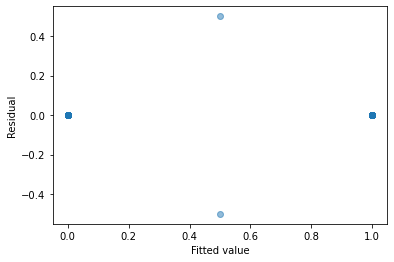

In [35]:
#Lets visualise this with a plot
residuals = sm_model.fittedvalues - y

import matplotlib.pyplot as plt
plt.scatter(x = sm_model.fittedvalues, y = residuals, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual")

In [36]:
#Lets try a normal QQ plot

((array([-3.39464078, -3.14374321, -3.00458783, ...,  3.00458783,
          3.14374321,  3.39464078]),
  array([-0.5, -0.5, -0.5, ...,  0.5,  0.5,  0.5])),
 (0.0047454737306235895, -1.7485720409873028e-10, 0.173754469031435))

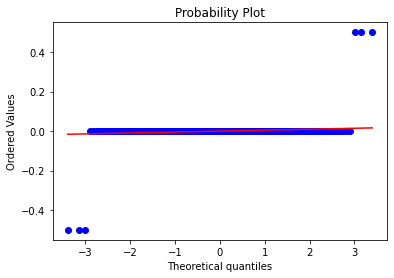

In [37]:
import scipy as sp
sp.stats.probplot(residuals, dist = "norm", plot = plt, fit = True)

In [38]:
from sklearn import tree #lets try decision tree model now

model = tree.DecisionTreeClassifier(max_features = 3, max_depth = 5)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=3)

In [39]:
#Check mean accuracy
model.score(X_test, y_test)

0.47029702970297027

In [41]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
model.score(X_test, y_test)

0.7046204620462047

In [ ]:
#Linear regression appears to be the best model looking at the scores given